In [10]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

# Load data and convert to datetime format (assuming 'Date' is a date column)
df = pd.read_csv('synthesized_data.csv')
df['Date'] = pd.to_datetime(df['Year'])
df.set_index('Date', inplace=True)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Price'].iloc[0:train_size], df['Price'].iloc[train_size:]

# Normalize the data (optional, can help with non-stationary series)
train_log = np.log(train)
test_log = np.log(test)

# Fine-tune ARIMA model using auto_arima with stepwise selection
model = auto_arima(train_log,
                   start_p=1, start_q=1,
                   max_p=7, max_q=7,
                   d=None,              # Let auto_arima find the best differencing
                   seasonal=True, m=12,
                   start_P=0, start_Q=0,
                   max_P=5, max_Q=5,
                   D=1,                 # Try different levels of seasonal differencing
                   stepwise=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

# Fit the model
model_fit = model.fit(train_log)

# Forecast future prices on test set
forecast_log = model_fit.predict(n_periods=len(test))

# Convert forecast back to original scale
forecast = np.exp(forecast_log)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluation
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# If RMSE is not below 0.5, consider further tuning or alternative models


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-6271.598, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-4473.173, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-6526.849, Time=1.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-5361.118, Time=2.79 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-4450.440, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6271.739, Time=0.36 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-6643.910, Time=6.50 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=-6681.973, Time=11.53 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=-6693.458, Time=25.97 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=-6719.945, Time=50.06 sec
 ARIMA(1,0,0)(5,1,1)[12] intercept   : AIC=-6746.003, Time=75.33 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=-6739.484, Time=32.92 sec
 ARIMA(1,0,0)(5,1,2)[12] intercept   : AIC=-6749.139, Time=66.65 sec
 ARIMA(1,0,0)(4,1,2)[12] intercept   : AIC=-6771.593, Time=34.20 se

KeyboardInterrupt: 

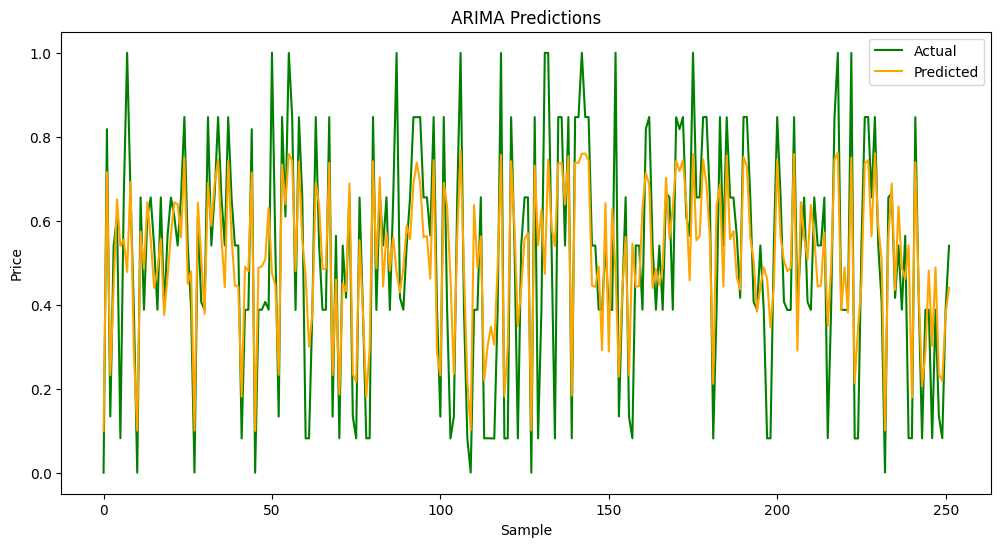

In [22]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_log, label='Actual', color='green')
plt.plot(forecast_log, label='Predicted', color='orange')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()